<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1D Convolutional Neural Networks**

"A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics." [4]

"The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area." [4]

"Convolutional neural network models were developed for image classification problems, where the model learns an internal representation of a two-dimensional input, in a process referred to as feature learning." [1]

"This same process can be harnessed on one-dimensional sequences of data, such as in the case of acceleration and gyroscopic data for human activity recognition. The model learns to extract features from sequences of observations and how to map the internal features to different activity types." [1]

"The benefit of using CNNs for sequence classification is that they can learn from the raw time series data directly, and in turn do not require domain expertise to manually engineer input features. The model can learn an internal representation of the time series data and ideally achieve comparable performance to models fit on a version of the dataset with engineered features." [1]

**Convolutional Neural Network Architecture**
"A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer." [5]

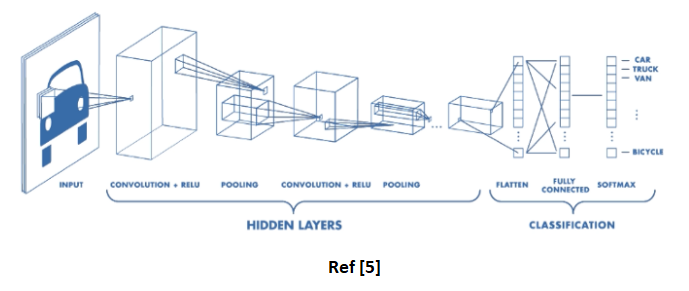

**Convolution Layer**
"The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load." [5]

"This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels." [5]

"During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an activation map that gives the response of the kernel at each spatial position of the image. The sliding size of the kernel is called a stride.
If we have an input of size W x W x D and Dout number of kernels with a spatial size of F with stride S and amount of padding P, then the size of output volume can be determined by the following formula:" [5]

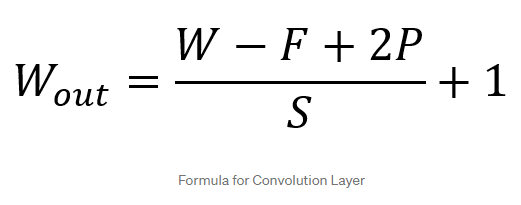

**Pooling Layer**
"The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually." [5]

"There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel. However, the most popular process is max pooling, which reports the maximum output from the neighborhood." [5]

"If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula:" [5]

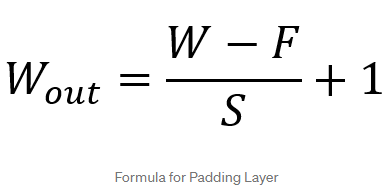

"This will yield an output volume of size Wout x Wout x D.
In all cases, pooling provides some translation invariance which means that an object would be recognizable regardless of where it appears on the frame." [5]

**Fully Connected Layer**
"Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular FCNN. This is why it can be computed as usual by a matrix multiplication followed by a bias effect." [5]

"The FC layer helps to map the representation between the input and the output." [5]

**Non-Linearity Layers**
"Since convolution is a linear operation and images are far from linear, non-linearity layers are often placed directly after the convolutional layer to introduce non-linearity to the activation map." [5]

"There are several types of non-linear operations, the popular ones being:" [5]
1. Sigmoid
2. Tanh
3. ReLU

</br>

**Advantages:**
1.  Speed vs. other type of neural networks [2]
2.  Capacity to extract the most important features automatically [2]

**Disadvantages:**
1.  Classification of similar objects with different Positions [3]
2.  Vulnerable to adversarial examples [3]
3.  Coordinate Frame [3]
4.  Other minor disadvantages like performance [3]

**References:**
1.  https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
2.  https://cai.tools.sap/blog/ml-spotlight-cnn/
3.  https://iq.opengenus.org/disadvantages-of-cnn/
4.  https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
5.  https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939



In [ ]:
pip install tensorflow

In [ ]:
!pip install fsspec

     |████████████████████████████████| 118 kB 5.4 MB/s 


In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical # previous commented out line does not work
 
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
  #filepath = prefix + group + '/Inertial Signals/' 
  filepath = 'https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/UCI%20HAR%20Dataset/' + group + '/Inertial%20Signals/'
	# load all 9 files as a single array
  filenames = list()
	# total acceleration
  filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
  filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
  filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
  X = load_group(filenames, filepath)
	# load class output
  #y = load_file(prefix + group + '/y_'+group+'.txt')
  y = load_file('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/UCI%20HAR%20Dataset/'+group+'/y_'+group+'.txt')
  return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
  #trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
  trainX, trainy = load_dataset_group('train', prefix) 
  print(trainX.shape, trainy.shape)
	# load all test
  #testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
  testX, testy = load_dataset_group('test', prefix)
  print(testX.shape, testy.shape)
	# zero-offset class values
  trainy = trainy - 1
  testy = testy - 1
	# one hot encode y
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  print(trainX.shape, trainy.shape, testX.shape, testy.shape)
  return trainX, trainy, testX, testy
 
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
 
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.363
>#2: 88.157
>#3: 92.467
>#4: 90.601
>#5: 90.227
>#6: 90.058
>#7: 91.992
>#8: 90.363
>#9: 89.786
>#10: 91.211
[90.3630793094635, 88.15745115280151, 92.46691465377808, 90.60060977935791, 90.22734761238098, 90.05768299102783, 91.99185371398926, 90.3630793094635, 89.78622555732727, 91.21140241622925]
Accuracy: 90.523% (+/-1.136)
